In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import math


Milestone 01

Module 1: Data Collection

In [ ]:
data=pd.read_csv("C:\Users\Admin\Desktop\FWI Dataset.csv")
print(data.head())

   day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2  3.9   

   FWI    Classes    Region  
0  0.5  not fire     Bejaia  
1  0.4  not fire     Bejaia  
2  0.1  not fire     Bejaia  
3    0  not fire     Bejaia  
4  0.5  not fire     Bejaia  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


In [ ]:
print(data.describe())

              day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

            Rain         FFMC         DMC         ISI         BUI  
count  244.000000  244.000000  244.000000  244.000000  244.000000  
mean     0.760656   77.887705   14.673361    4.774180   16.664754  
std      1.999406   14.337571   12.368039    4.175318   14.204824  
min      0.000000   28.60

In [ ]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [ ]:
#shape
data.shape

(244, 15)

Module 2: Data Exploration and Data Preprocessing

In [ ]:
# Handling Missing Values

data['DC'] = data['DC'].astype(str).str.replace(' ', '', regex=False)
data['FWI'] = data['FWI'].astype(str).str.replace(' ', '', regex=False)


data['DC'] = pd.to_numeric(data['DC'], errors='coerce')
data['FWI'] = pd.to_numeric(data['FWI'], errors='coerce')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB


In [ ]:
# Identify rows with missing values
null_rows = data[data.isnull().any(axis=1)]
print("Rows with missing values:\n", null_rows)

Rows with missing values:
      day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC     DC   ISI  \
165   14      7  2012           37   37   18    0.2  88.9  12.9  14.69  12.5   

      BUI  FWI Classes            Region  
165  10.4  NaN       NaN  Sidi-Bel Abbes  


In [ ]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [ ]:
# Fill missing values using mode
for col in data.columns:
    data.loc[:, col] = data[col].fillna(data[col].mode()[0])

# Drop remaining missing values
data.dropna(inplace=True)

data.isnull().sum()


day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [ ]:
# drop unnecessary columns
data.drop(columns=[col for col in data.columns if "Unnamed" in col], inplace=True)

data.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


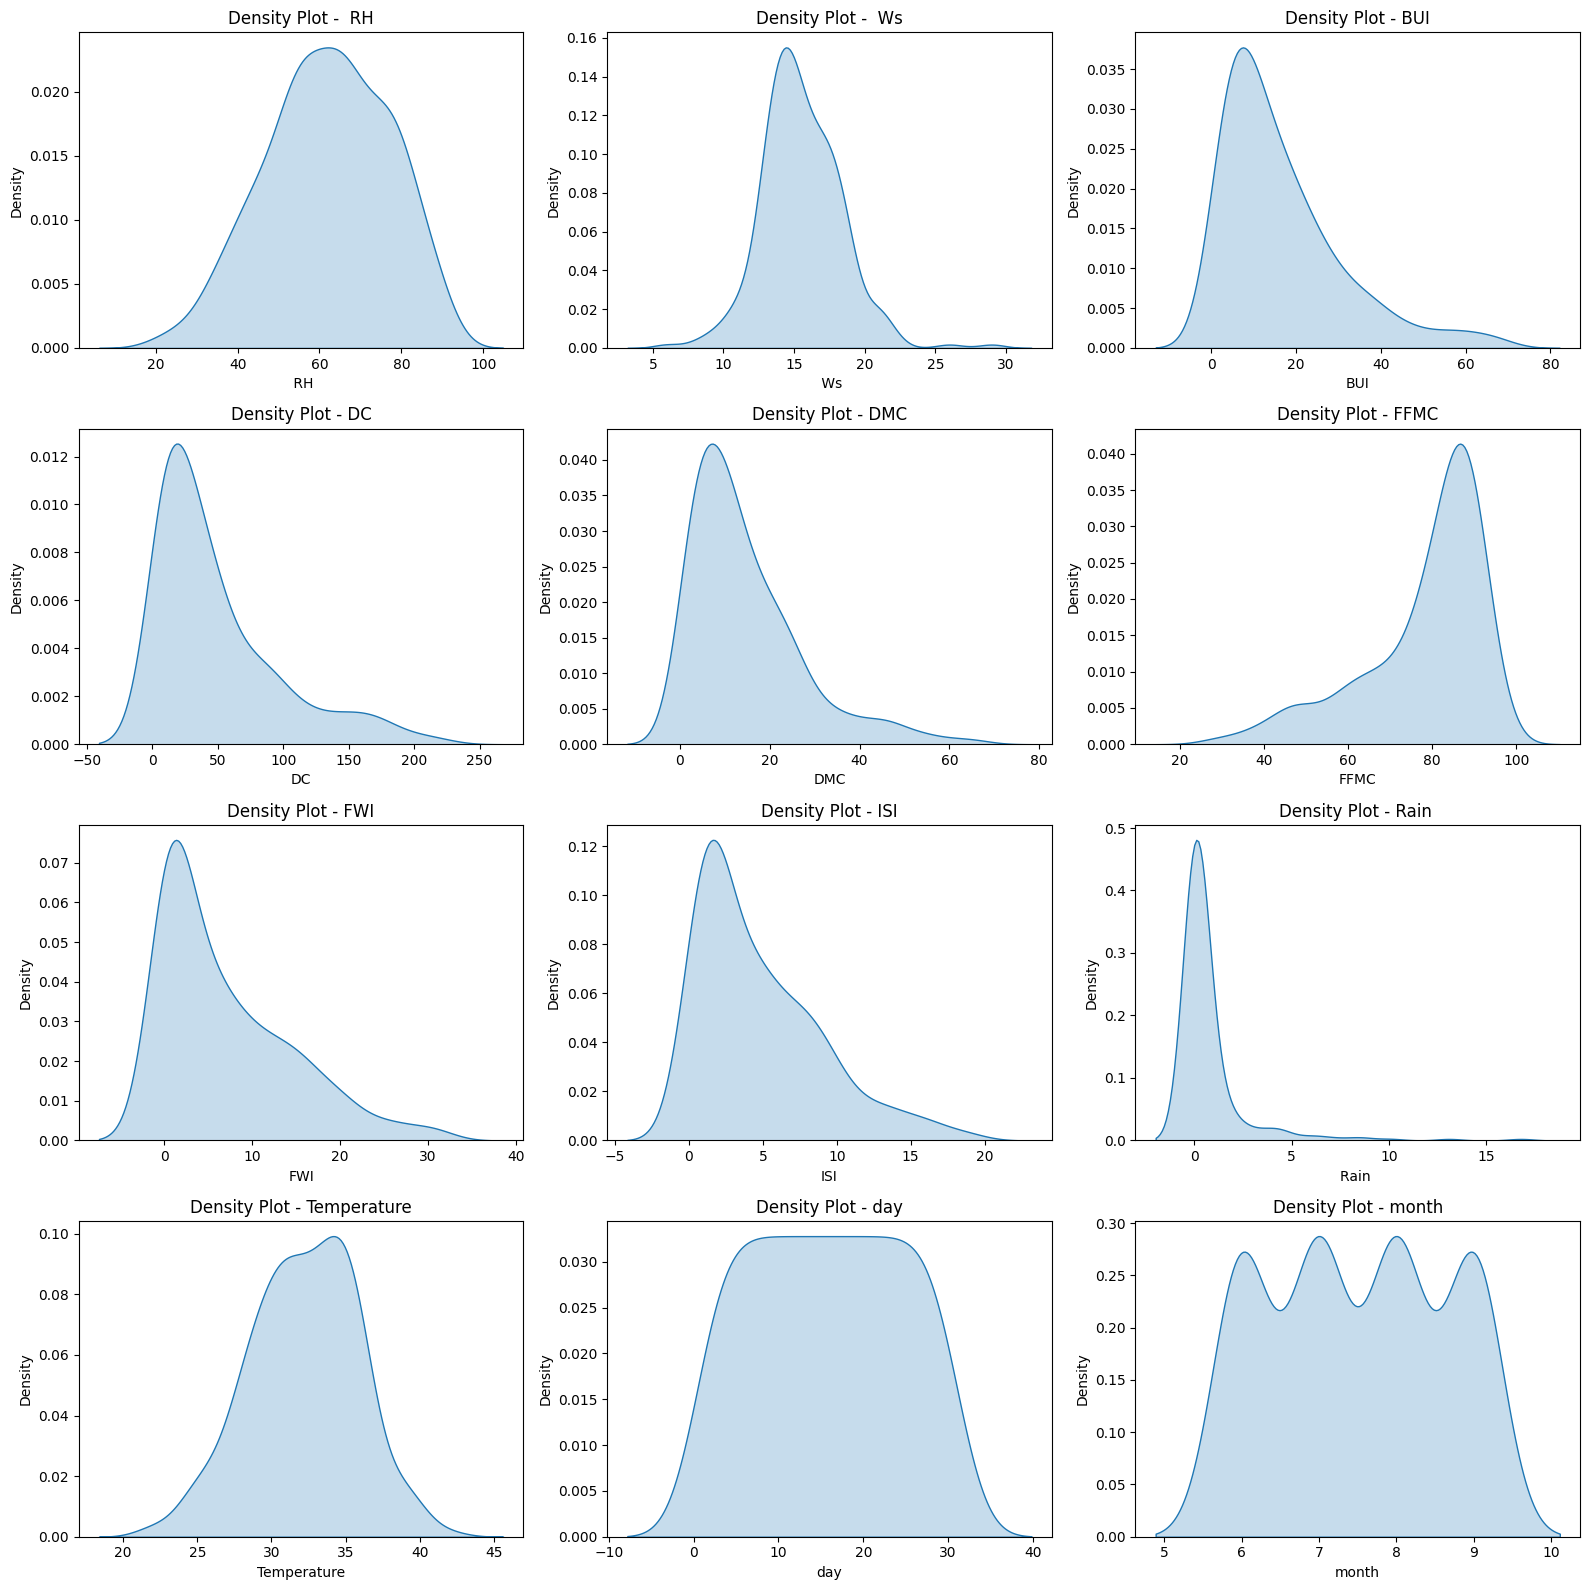

In [70]:
# density plots for numerical features
 
# Select numerical columns
num_cols = sorted([col for col in data.columns if data[col].dtype != "object"])

valid_cols = []

# Filter out columns with zero variance
for col in num_cols:
    if data[col].nunique() > 1:   
        valid_cols.append(col)

cols = 3
rows = math.ceil(len(valid_cols) / cols)

plt.figure(figsize=(16, 4 * rows))

for i, col in enumerate(valid_cols, start=1):
    plt.subplot(rows, cols, i)
    sns.kdeplot(data[col], fill=True)
    plt.title(f"Density Plot - {col}")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


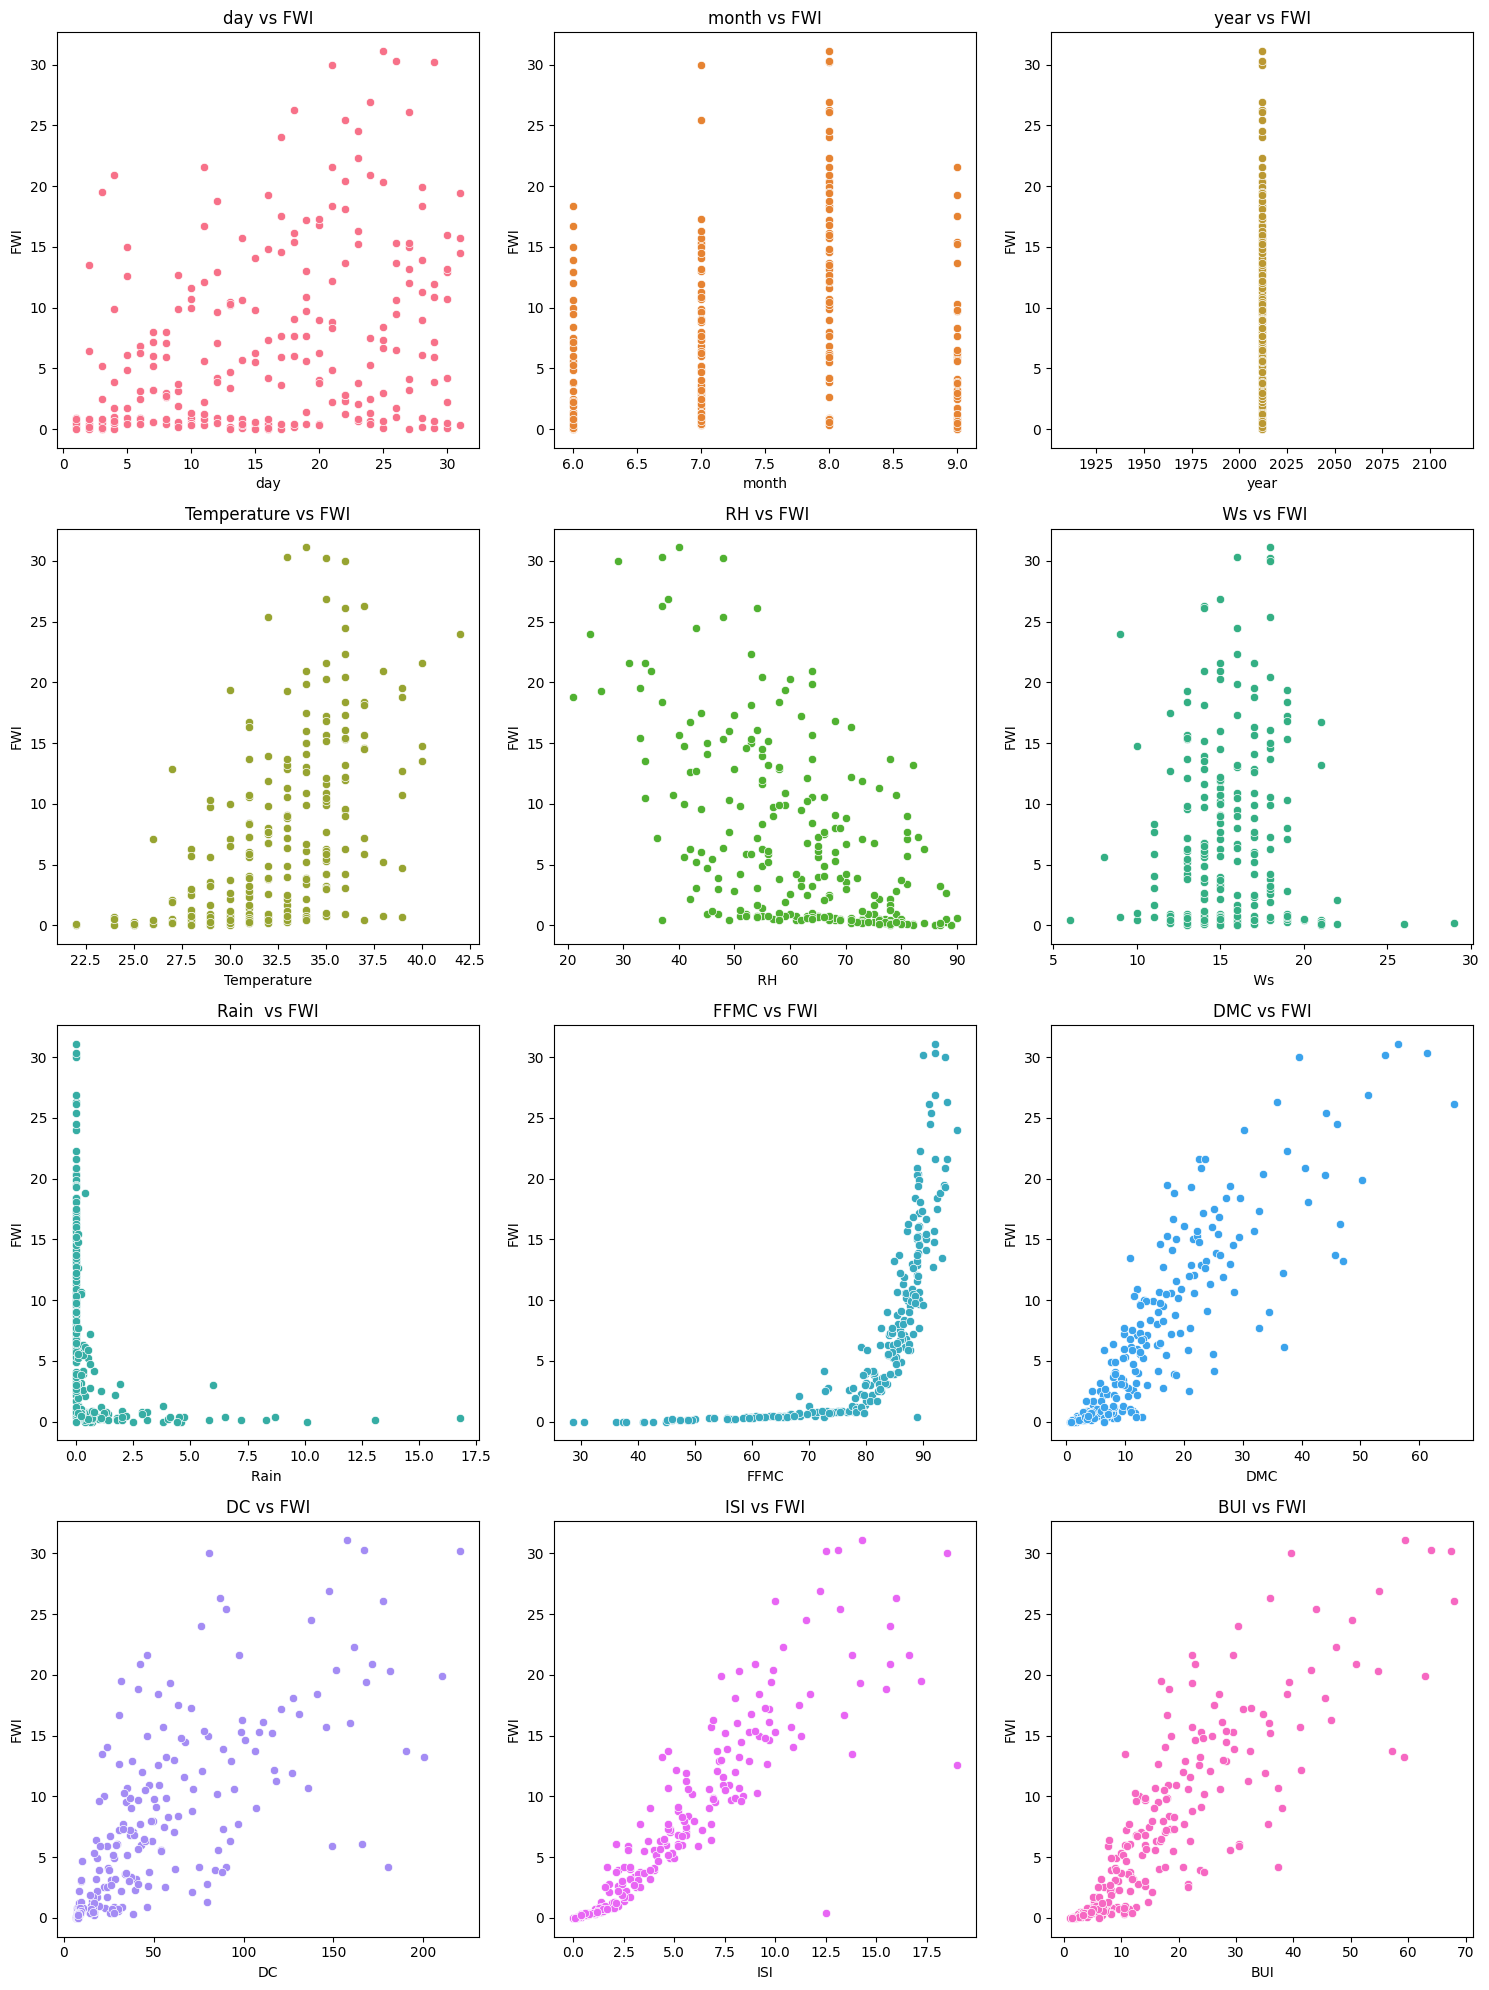

In [71]:
# Scatter Plots of Numerical Features vs FWI

num_cols = [col for col in data.select_dtypes(include=['float64', 'int64']).columns if col != "FWI"]

palette = sns.color_palette("husl", len(num_cols))  # colorful palette
cols = 3
rows = math.ceil(len(num_cols) / cols)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(num_cols, start=1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=data[col], y=data["FWI"], color=palette[i-1])
    plt.xlabel(col)
    plt.ylabel("FWI")
    plt.title(f"{col} vs FWI")

plt.tight_layout()
plt.show()


<Figure size 1200x1200 with 0 Axes>

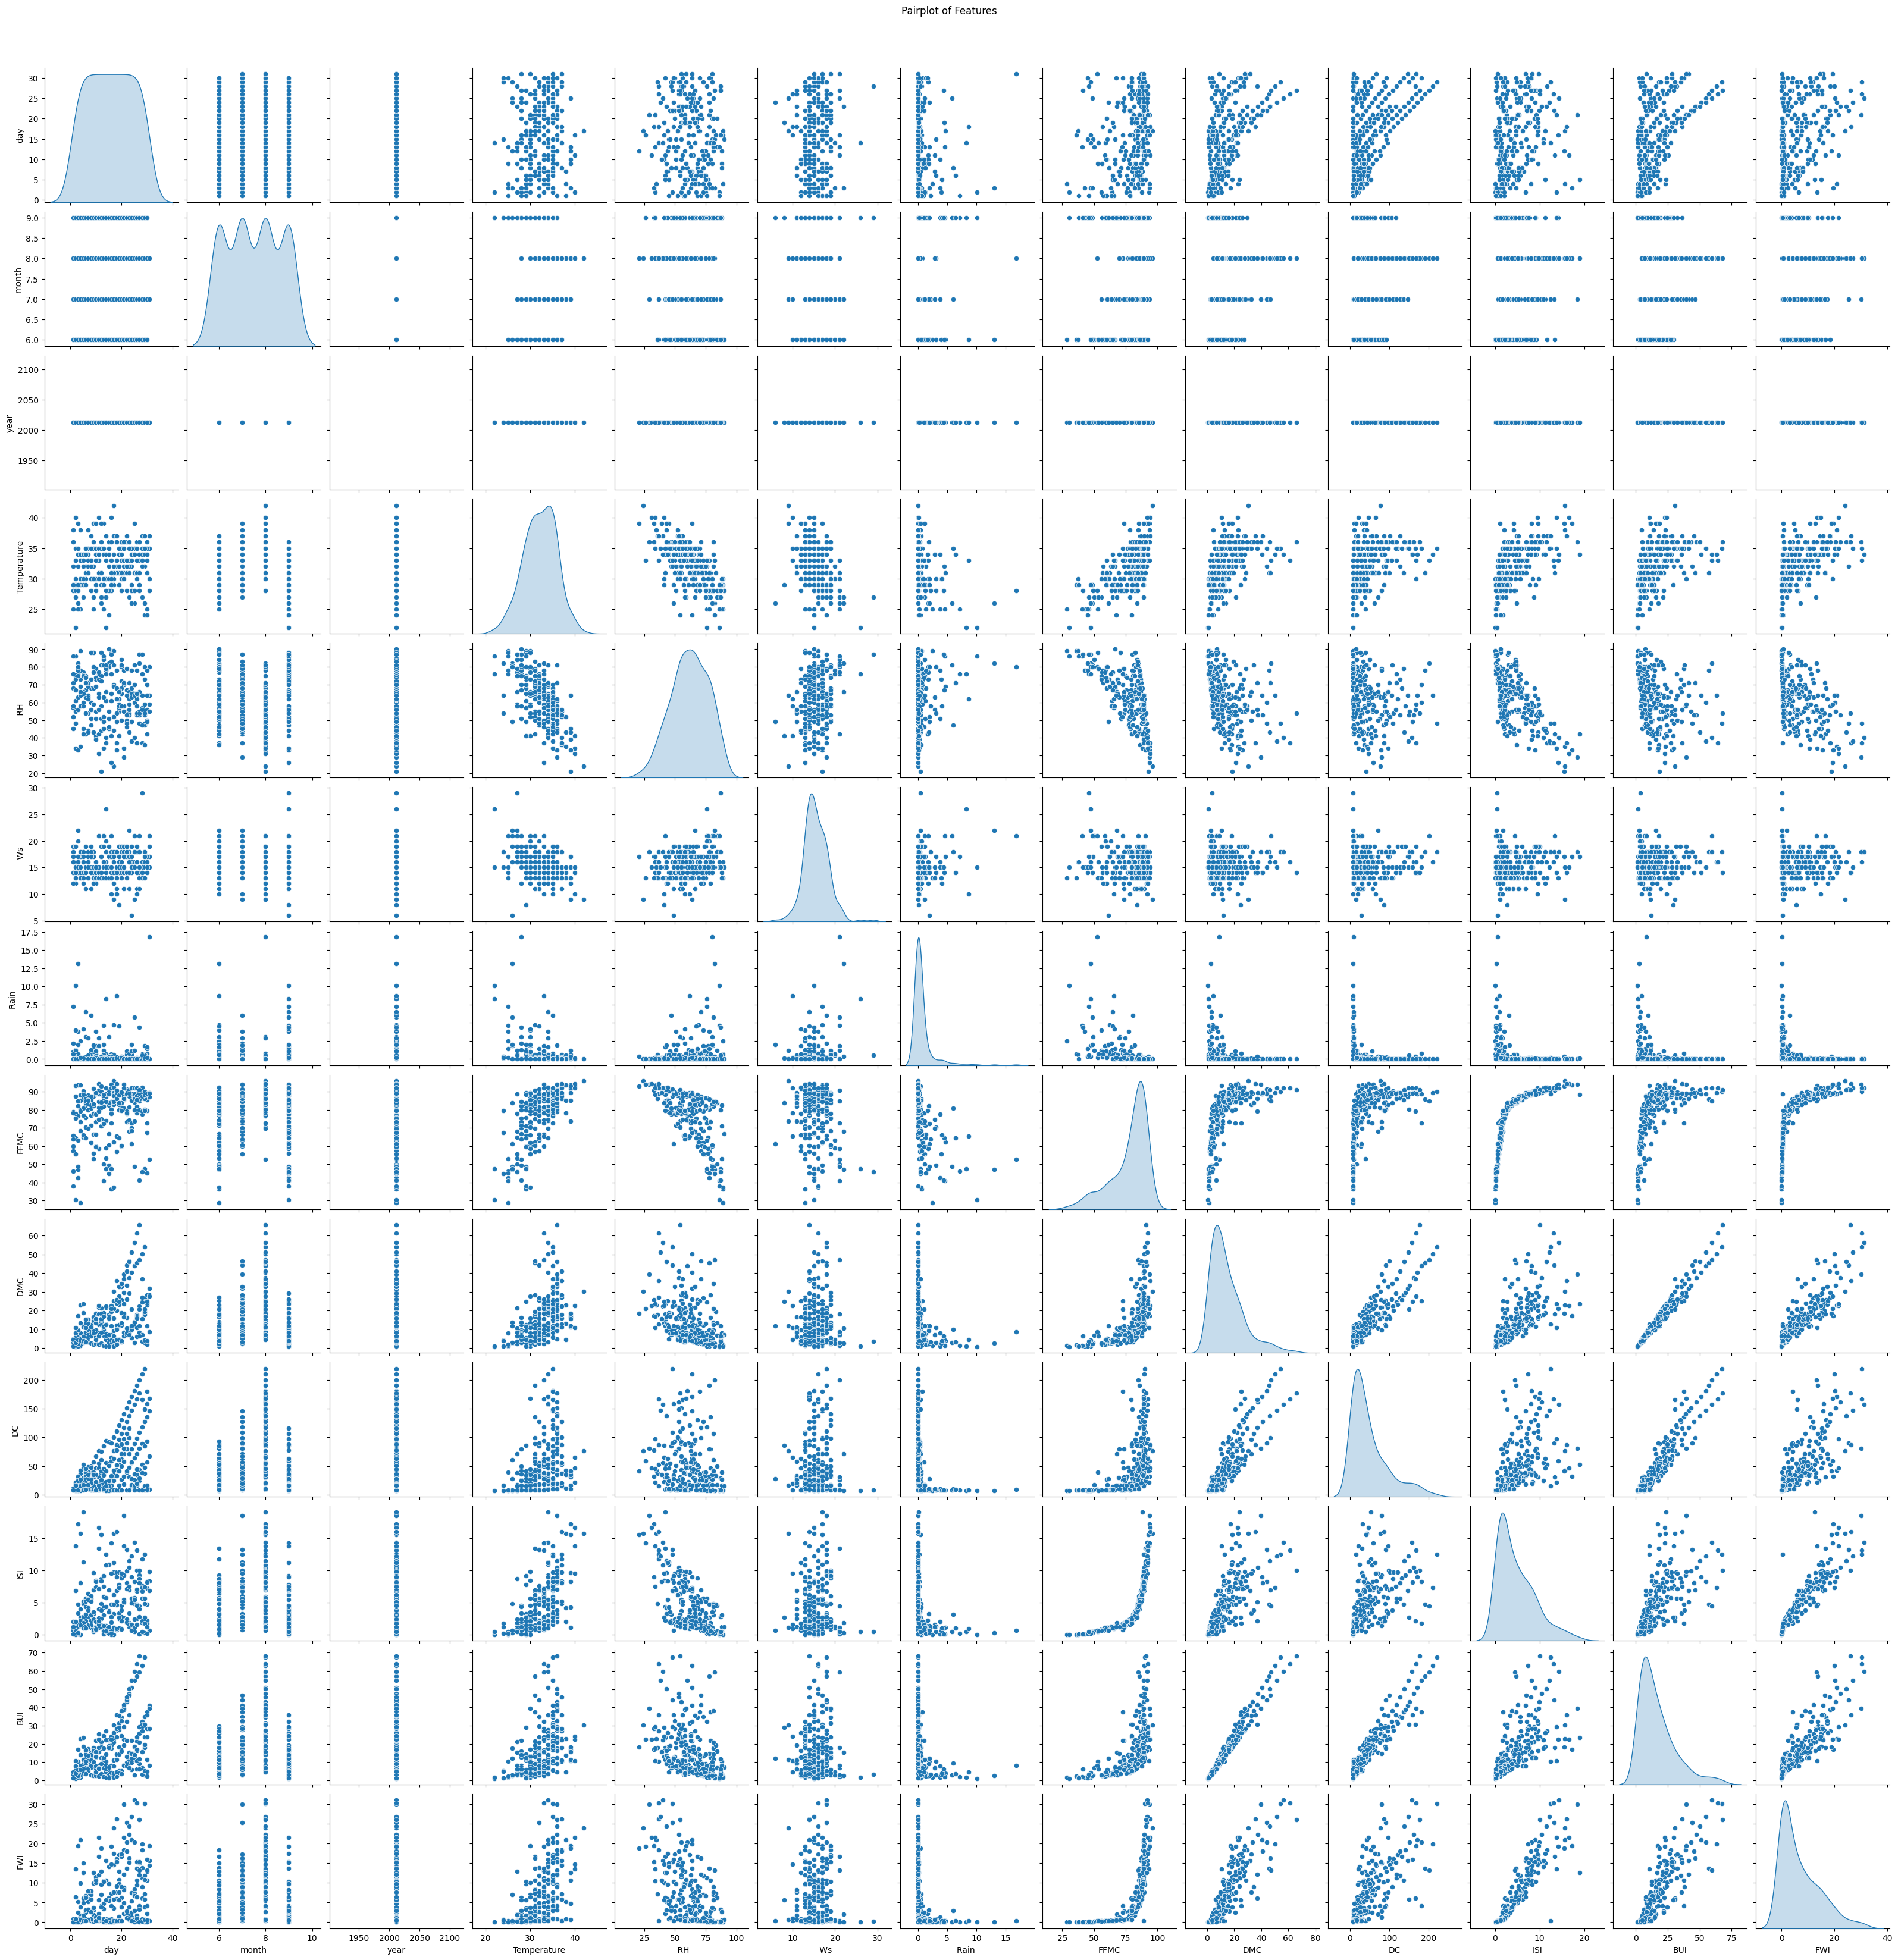

In [74]:
plt.figure(figsize=(12, 12))
sns.pairplot(data, diag_kind='kde')  # data = your dataframe
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [75]:
# Encoding Categorical Variables

if "Region" in data.columns:
    le = LabelEncoder()
    data["Region"] = le.fit_transform(data["Region"])


In [76]:
columns_to_drop = ['Classes  ', 'day', 'month', 'year','Region']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

print("Updated columns after dropping :")
print(data.columns)

Updated columns after dropping :
Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')


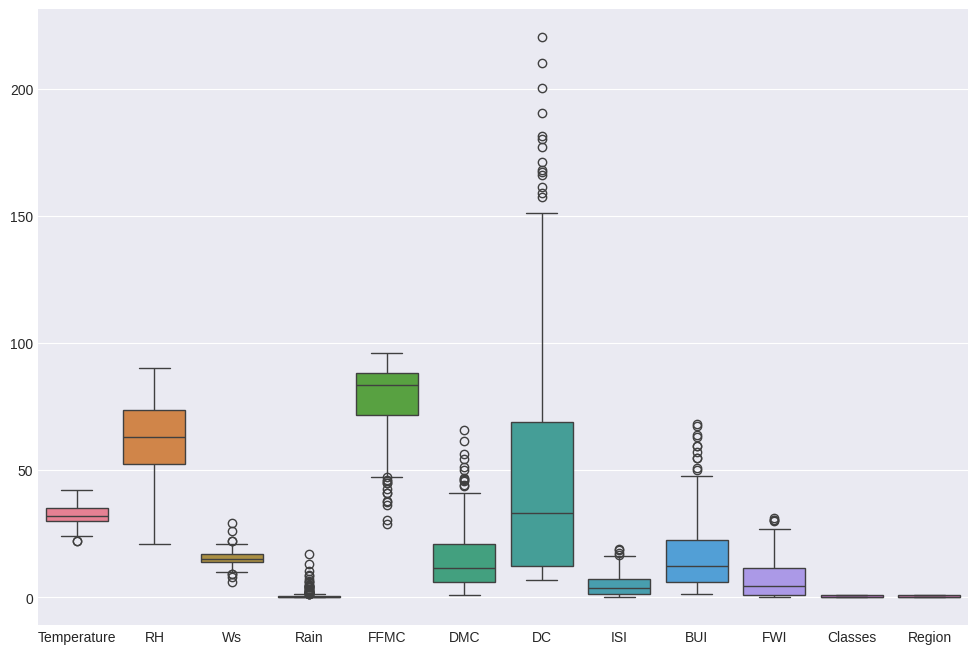

In [ ]:
# Bolxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_copy)
plt.show()

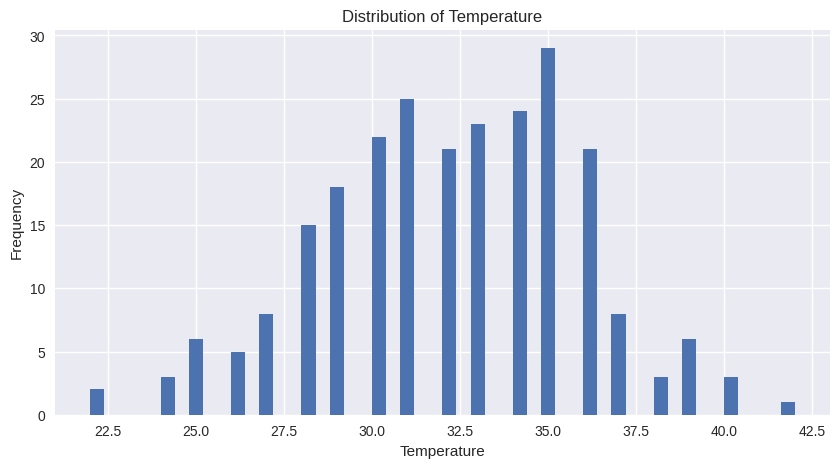

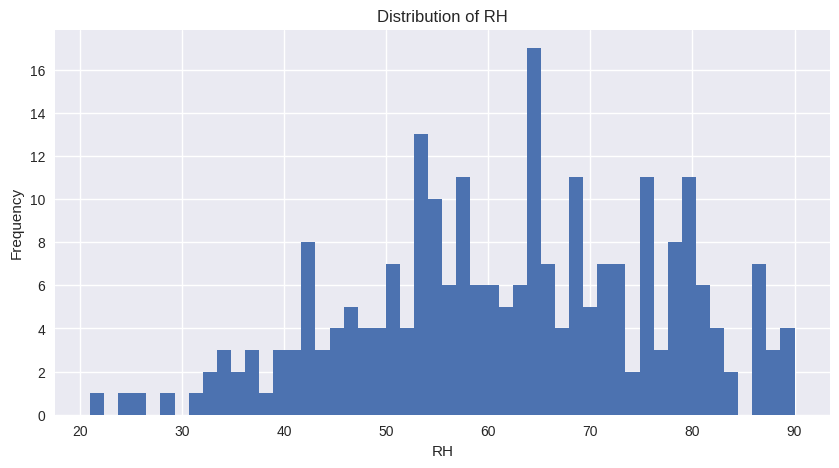

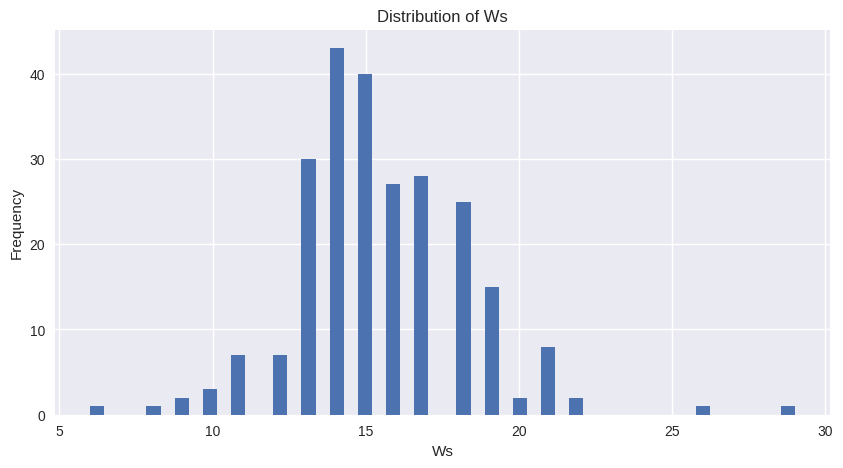

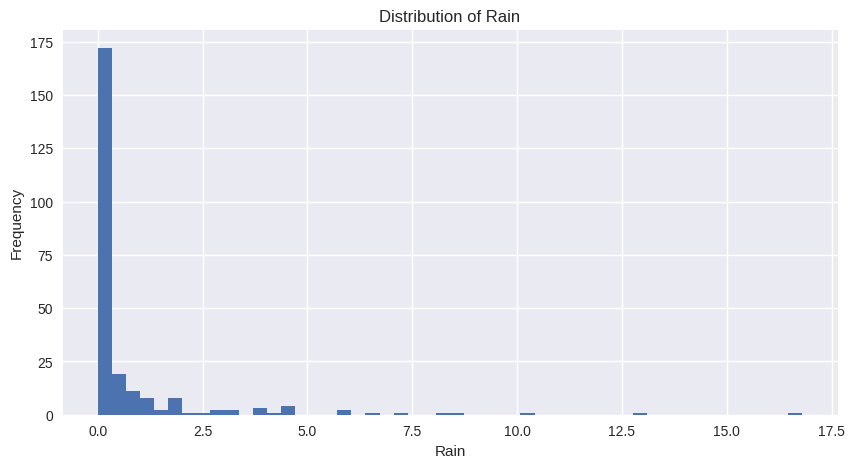

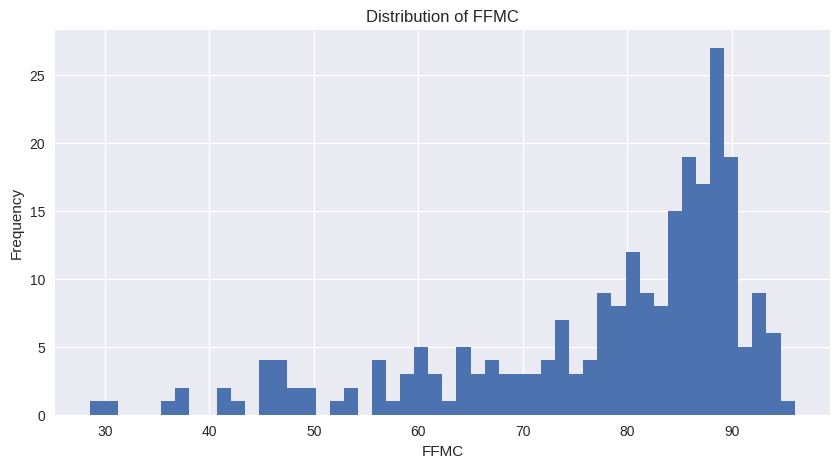

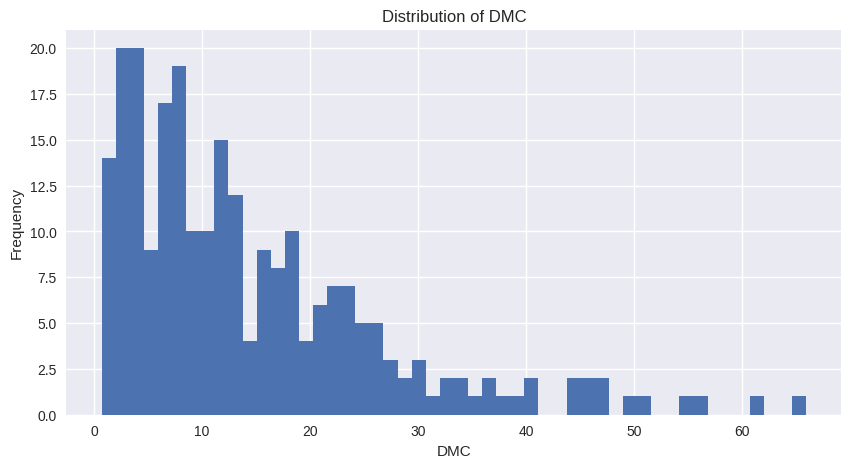

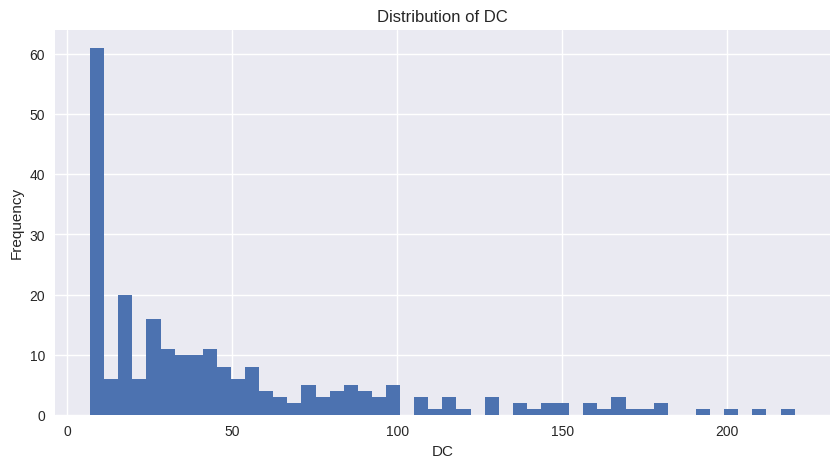

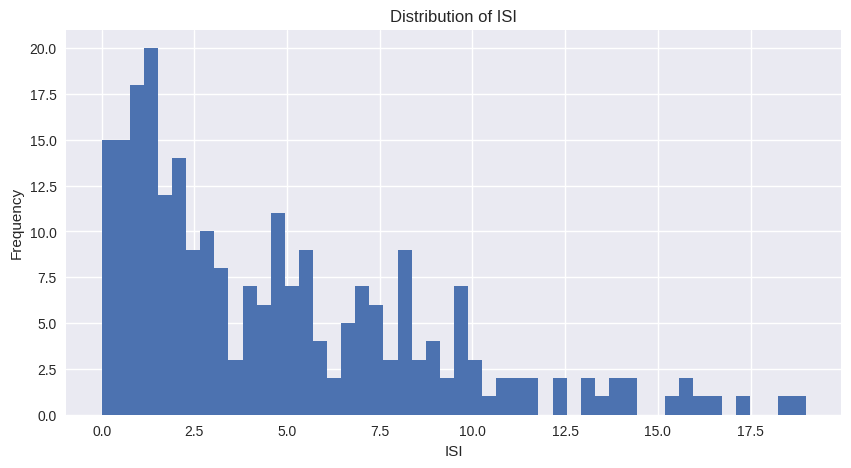

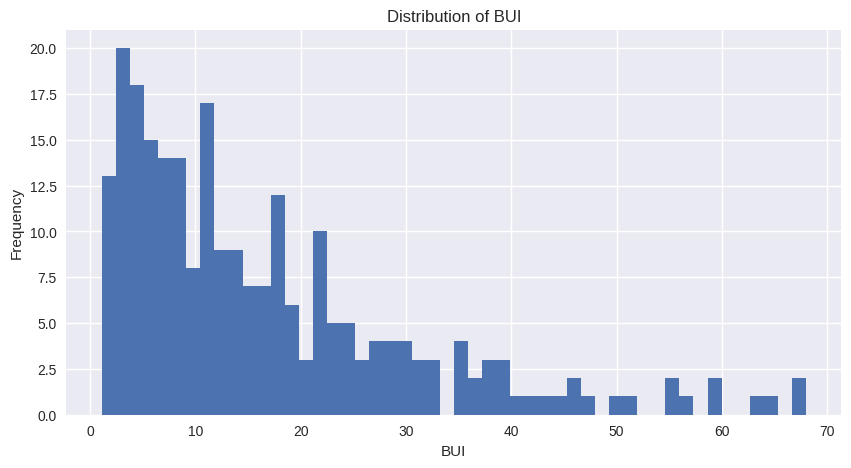

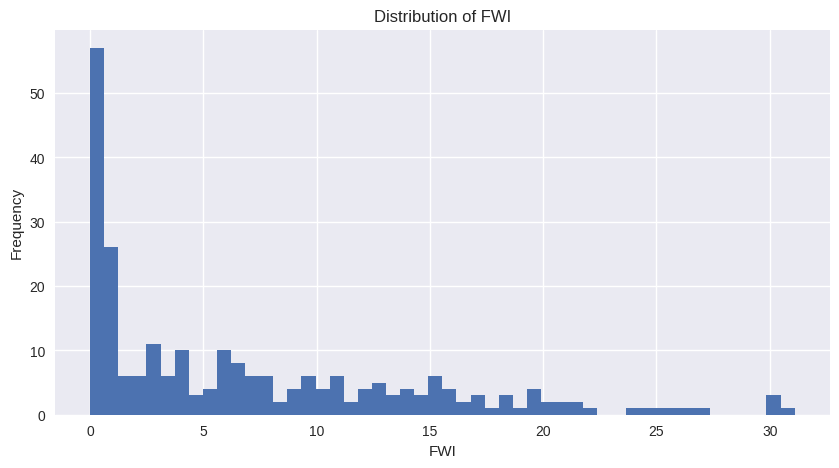

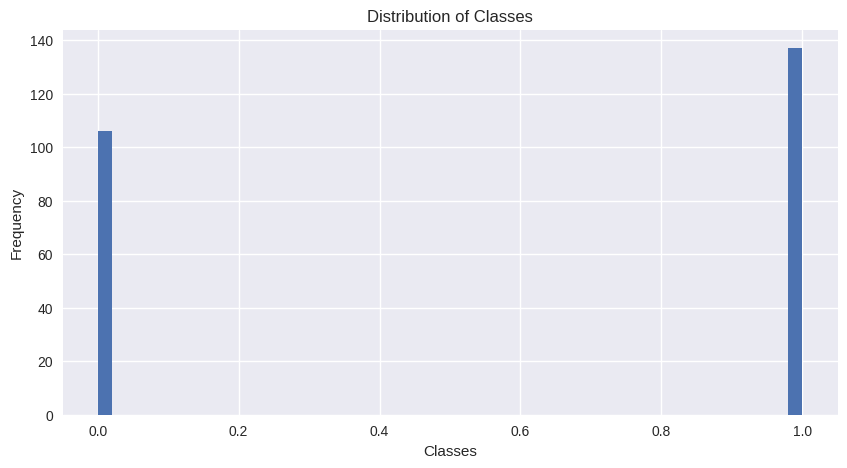

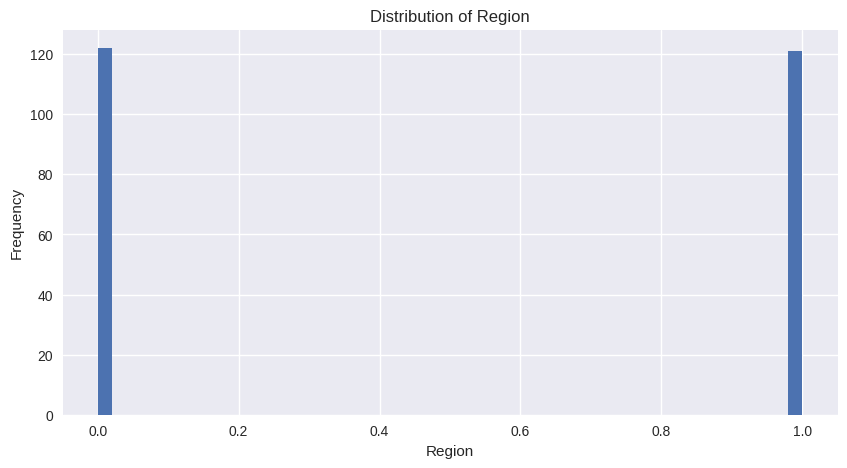

In [ ]:
plt.style.use('seaborn-v0_8')

for i in df1.columns:
  fig, ax = plt.subplots(figsize=(10,5))
  ax.hist(x=df1[i], bins=50)
  plt.title(f'Distribution of {i}')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()

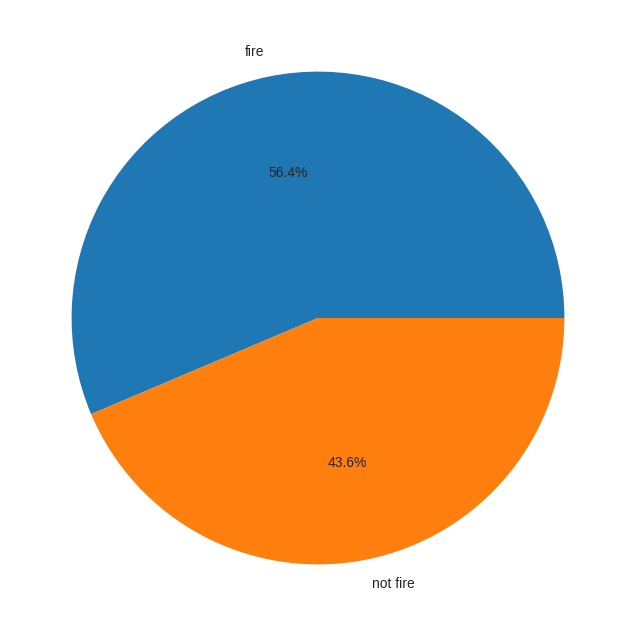

In [ ]:
# visualization using piechart
percentages = df_copy['Classes'].value_counts(normalize=True)*100
classlabel = ['fire','not fire']
plt.figure(figsize=(13,8))
plt.pie(percentages,labels=classlabel,autopct='%1.1f%%')
plt.show()

In [ ]:
# Relation between each pair of features
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,-0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,-0.719216,0.197102


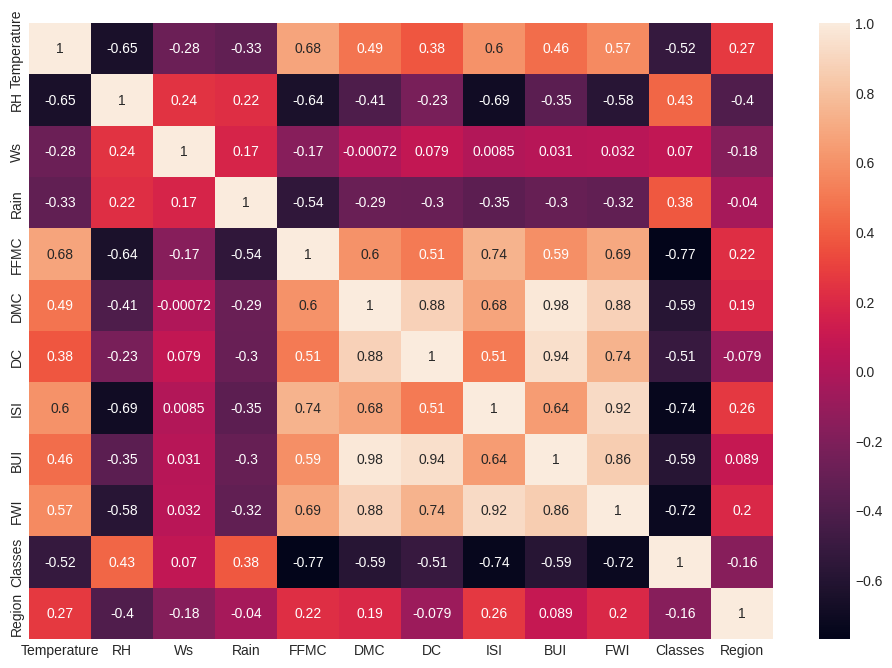

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_copy.corr(), annot=True)
plt.show()

In [ ]:
data.to_csv("C:\Users\Admin\Desktop\cleaned_FWI_dataset.csv", index=False)
print("Cleaned data saved successfully!")


Cleaned data saved successfully!


Milestone 2: Week 3-4

Module 3: Feature Engineering and Scaling

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Mean:", cv_scores.mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int64  
 1   RH           244 non-null    int64  
 2   Ws           244 non-null    int64  
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           244 non-null    float64
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          244 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 19.2 KB


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


Only numerical features were considered while computing the correlation matrix to avoid errors caused by categorical variables. Features with an absolute correlation value greater than 0.3 with the target variable (FWI) were selected for model training.


This implementation uses a Pipeline-based approach, includes cross-validation, and evaluates performance using multiple regression metrics for robustness.

In [79]:
#
data1['FWI'] = pd.to_numeric(data1['FWI'], errors='coerce')
data1 = data1.dropna(subset=['FWI'])


In [80]:
threshold = 0.3 

correlation = data1.corr()[['FWI']].abs()
selected_features = correlation[correlation > threshold].index.drop('FWI')

print("Selected Features:")
print(set(selected_features))

Selected Features:
{'FFMC', 'ISI', 'RH', 'DC', 'Rain', 'BUI', 'Ws', 'Temperature', 'DMC'}


Split Dataset into Features (X) and Target (y)

In [81]:
X = data1[list(selected_features)]
y = data1['FWI']

X = X.apply(pd.to_numeric, errors='coerce')

# handle missing values
X = X.fillna(X.mean())
print(X.isnull().sum())


print("Input Features Shape:", X.shape)
print("Target Shape:", y.shape)


Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
dtype: int64
Input Features Shape: (244, 9)
Target Shape: (244,)


In [82]:
#correlation 
data1['DC'] = pd.to_numeric(data1['DC'], errors='coerce')
data1['FWI'] = pd.to_numeric(data1['FWI'], errors='coerce')

corrWithFwi = (
    data1[list(selected_features) + ['FWI']]
    .corr()['FWI']
    .sort_values(ascending=False)
)

print("Correlation of selected features :")
print(corrWithFwi)

Correlation of selected features :
FWI            1.000000
ISI            0.908054
DMC            0.874924
BUI            0.857847
DC             0.740175
FFMC           0.686342
Temperature    0.558800
Ws             0.029001
Rain          -0.322810
RH            -0.570483
Name: FWI, dtype: float64


In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, random_state=42, shuffle=True, 
    random_state=42
)

print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)


Training Data: (195, 9)
Testing Data: (49, 9)


Feature Scaling using StandardScaler

In [84]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Mean:", cv_scores.mean())


Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
dtype: object


In [85]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Mean:", cv_scores.mean())


        Temperature            RH          Ws          Rain          FFMC  \
count  1.950000e+02  1.950000e+02  195.000000  1.950000e+02  1.950000e+02   
mean  -4.554761e-17  9.109522e-18    0.000000  1.366428e-17  4.554761e-18   
std    1.002574e+00  1.002574e+00    1.002574  1.002574e+00  1.002574e+00   
min   -2.694873e+00 -2.762828e+00   -3.705889 -3.732306e-01 -3.465707e+00   
25%   -6.788875e-01 -6.504717e-01   -0.635689 -3.732306e-01 -4.757572e-01   
50%   -6.892259e-03  5.364715e-02   -0.251914 -3.732306e-01  4.015754e-01   
75%    7.995020e-01  7.577660e-01    0.515636 -1.814521e-01  7.525084e-01   
max    2.681089e+00  1.864238e+00    3.969611  7.681470e+00  1.264871e+00   

              DMC            DC           ISI           BUI  
count  195.000000  1.950000e+02  1.950000e+02  1.950000e+02  
mean     0.000000  4.554761e-18 -9.109522e-18 -1.366428e-17  
std      1.002574  1.002574e+00  1.002574e+00  1.002574e+00  
min     -1.114369 -8.914821e-01 -1.149519e+00 -1.084825e+0

In [86]:
# Save the Scaler for Deployment
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)


Module 4: Model Training using Ridge Regression


This implementation uses a Pipeline-based approach, includes cross-validation, and evaluates performance using multiple regression metrics for robustness.

In [87]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pickle


Train the Ridge Regression Model


This implementation uses a Pipeline-based approach, includes cross-validation, and evaluates performance using multiple regression metrics for robustness.

In [88]:
ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train_scaled, y_train)


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


Hyperparameter Tuning

In [89]:
alphas = [0.01, 0.1, 1, 10, 100]
results = {}

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[a] = r2_score(y_test, y_pred)

results


{0.01: 0.9862061868814829,
 0.1: 0.9862705150140384,
 1: 0.9859555623886314,
 10: 0.975455594324904,
 100: 0.897376719683076}

In [90]:
# model evaluation
y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

print("Training R² Score:", r2_score(y_train, y_train_pred))
print("Testing R² Score:", r2_score(y_test, y_test_pred))
print("Testing MSE:", mean_squared_error(y_test, y_test_pred))

accuracy = ridge_model.score(X_test_scaled, y_test)
print("Model Accuracy:", accuracy)

Training R² Score: 0.9560578008746927
Testing R² Score: 0.9859555623886314
Testing MSE: 0.5473954387971778
Model Accuracy: 0.9859555623886314


In [ ]:
# with open("ridge.pkl", "wb") as file:
#     pickle.dump(ridge_model, file)
# # 

Milestone 3: Week 5-6
Module 5: Evaluation and Optimization

Train Different Models


This implementation uses a Pipeline-based approach, includes cross-validation, and evaluates performance using multiple regression metrics for robustness.

Linear Regression

In [92]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

with open('linear.pkl', 'wb') as file:
    pickle.dump(linear_model, file)
print("Linear Regression model saved successfully.")

accuracy = linear_model.score(X_test_scaled, y_test)
print("Model Accuracy:", accuracy)

Linear Regression model saved successfully.
Model Accuracy: 0.9861963876930295


Lasso Regression

In [93]:
Lasso_model = Lasso(alpha=0.1)
Lasso_model.fit(X_train_scaled, y_train)

with open('lasso.pkl', 'wb') as file:
    pickle.dump(Lasso_model, file)
print("Lasso Regression model saved successfully.")

accuracy = Lasso_model.score(X_test_scaled, y_test)
print("Model Accuracy:", accuracy)

Lasso Regression model saved successfully.
Model Accuracy: 0.9807656030852773


Random Forest

In [94]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

with open('random_forest.pkl', 'wb') as file:
    pickle.dump(random_forest, file)
print("Random Forest model saved successfully.")

accuracy = random_forest.score(X_test_scaled, y_test)
print("Model Accuracy:", accuracy)

Random Forest model saved successfully.
Model Accuracy: 0.9863214909862315


In [95]:
import warnings
warnings.filterwarnings("ignore")
models = {
    "Linear Regression": linear_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": Lasso_model,
    "Random Forest": random_forest
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])

results_df = pd.DataFrame(
    results,
    columns=["Model", "MAE", "RMSE", "R2 Score"]
)

print(results_df)

               Model       MAE      RMSE  R2 Score
0  Linear Regression  0.547969  0.733491  0.986196
1   Ridge Regression  0.550682  0.739862  0.985956
2   Lasso Regression  0.651793  0.865840  0.980766
3      Random Forest  0.468122  0.730160  0.986321


Random Forest is the best model as it achieves the lowest MAE and RMSE with the highest R² score, indicating superior prediction accuracy compared to the other models.


This implementation uses a Pipeline-based approach, includes cross-validation, and evaluates performance using multiple regression metrics for robustness.

Error Metrics Table

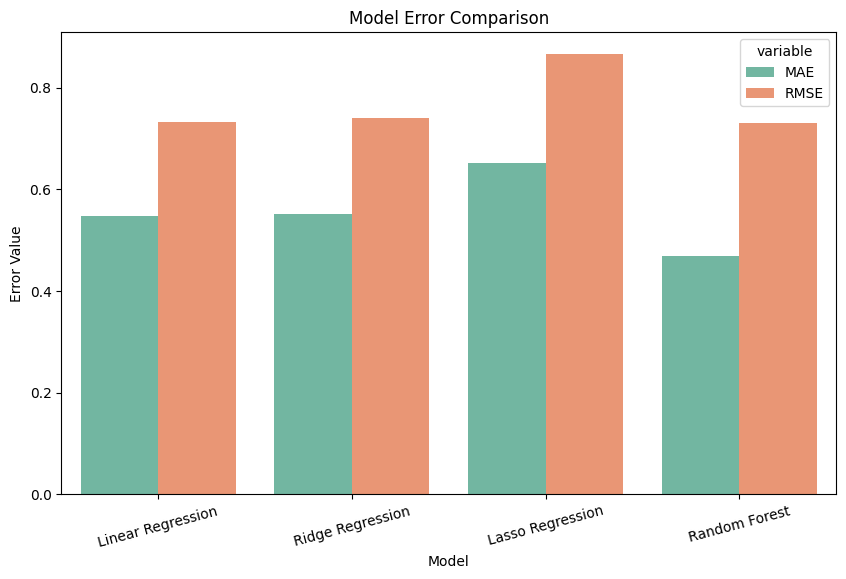

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_df.melt(id_vars="Model", 
                          value_vars=["MAE", "RMSE"]),
    x="Model",
    y="value",
    hue="variable",
    palette="Set2"
)

plt.title("Model Error Comparison")
plt.ylabel("Error Value")
plt.xticks(rotation=15)
plt.show()


Model Performance Summary


This implementation uses a Pipeline-based approach, includes cross-validation, and evaluates performance using multiple regression metrics for robustness.

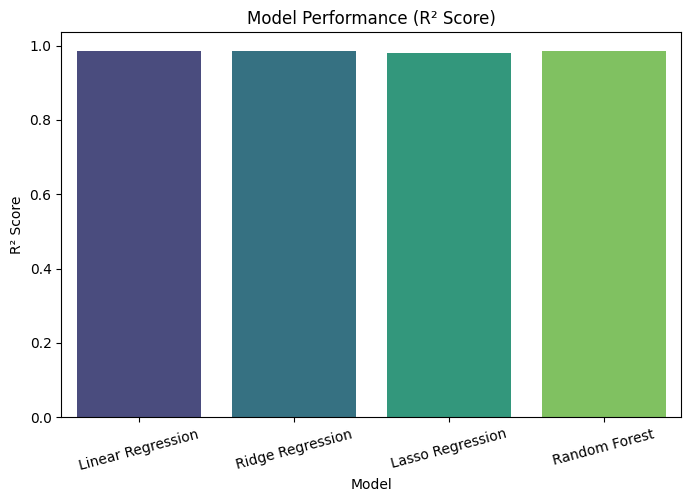

In [97]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8, 5))
sns.barplot(
    data=results_df,
    x="Model",
    y="R2 Score",
    palette="viridis"
)

plt.title("Model Performance (R² Score)")
plt.ylabel("R² Score")
plt.xticks(rotation=15)
plt.show()


Actual vs Predicted Plot

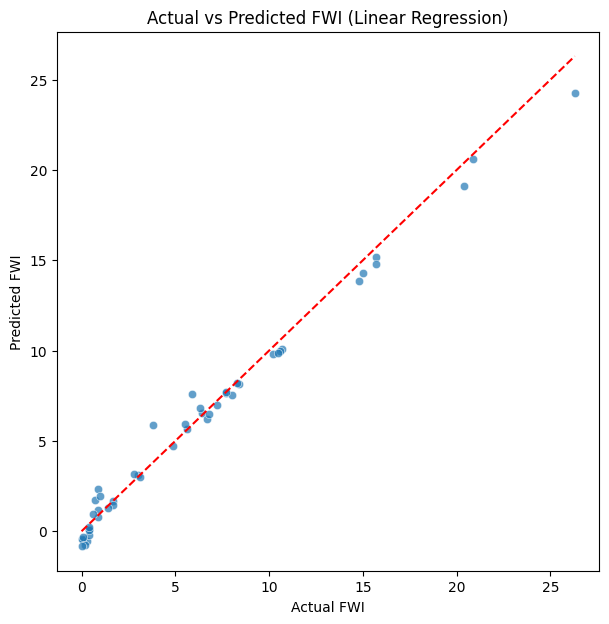

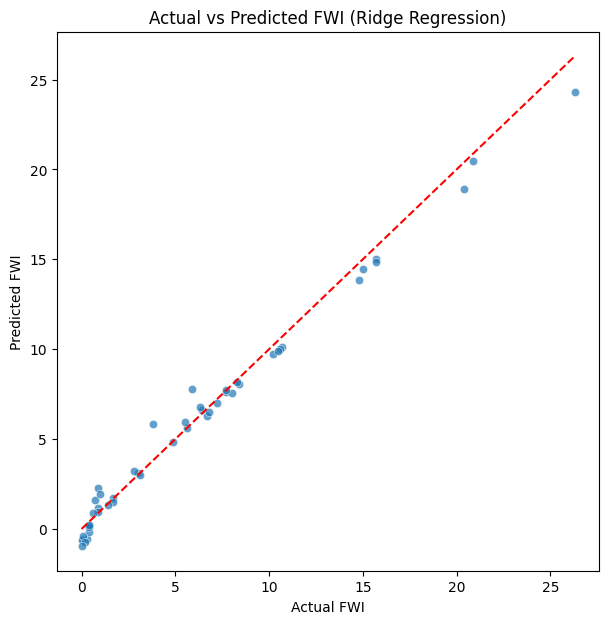

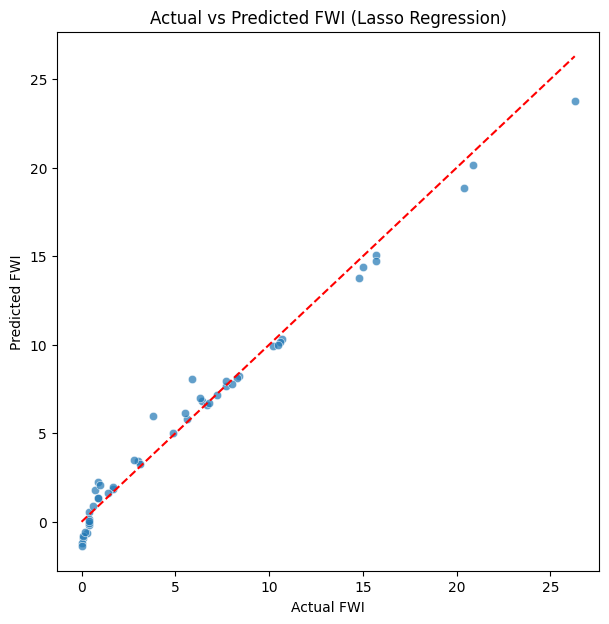

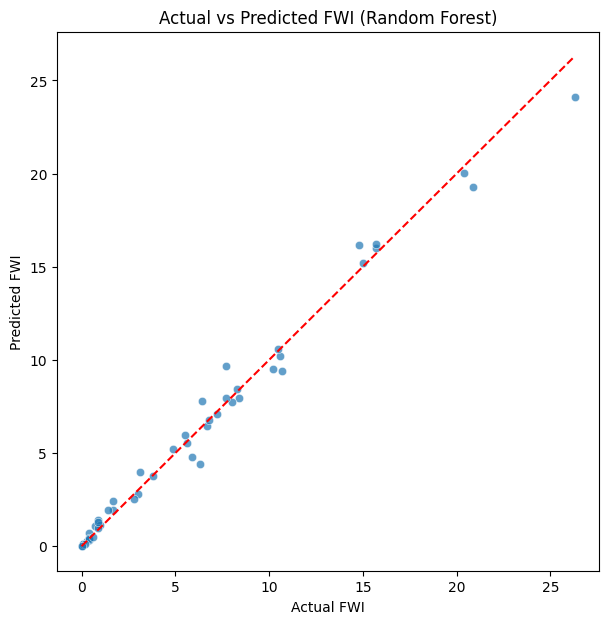

In [98]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    plt.figure(figsize=(7, 7))
    sns.scatterplot(
        x=y_test,
        y=y_pred,
        alpha=0.7
    )

    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'r--'
    )

    plt.xlabel("Actual FWI")
    plt.ylabel("Predicted FWI")
    plt.title(f"Actual vs Predicted FWI ({name})")
    plt.show()

Tuned model parameters (alpha) and retrained if needed to improve metrics.


This implementation uses a Pipeline-based approach, includes cross-validation, and evaluates performance using multiple regression metrics for robustness.

In [99]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_results = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)

    ridge_results.append([
        a,
        mean_absolute_error(y_test, y_pred),
        np.sqrt(mean_squared_error(y_test, y_pred)),
        r2_score(y_test, y_pred)
    ])

ridge_df = pd.DataFrame(
    ridge_results,
    columns=["Alpha", "MAE", "RMSE", "R2 Score"]
)

ridge_df


,Alpha,MAE,RMSE,R2 Score
0,0.001,0.547941,0.733464,0.986197
1,0.010,0.547687,0.733231,0.986206
2,0.100,0.545598,0.731519,0.986271
3,1.000,0.550682,0.739862,0.985956
4,10.000,0.737413,0.978081,0.975456
5,100.000,1.499309,1.999960,0.897377


In [100]:
best_alpha = ridge_df.loc[ridge_df["RMSE"].idxmin(), "Alpha"]

best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_scaled, y_train)

y_pred_best_ridge = best_ridge.predict(X_test_scaled)

Plot Tuned Ridge Performance

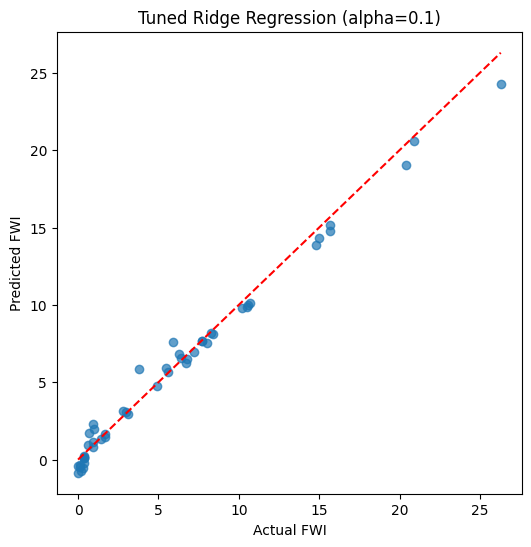

Tuned Ridge Regression Model Accuracy: 0.9862705150140384


In [101]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best_ridge, alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title(f"Tuned Ridge Regression (alpha={best_alpha})")
plt.show()


# Accuracy of the tuned model
accuracy = best_ridge.score(X_test_scaled, y_test)
print("Tuned Ridge Regression Model Accuracy:", accuracy)


Compare before and after Tunning Of Ridge Regression Model


This implementation uses a Pipeline-based approach, includes cross-validation, and evaluates performance using multiple regression metrics for robustness.

In [ ]:
comparison_df = pd.DataFrame({
    "Model": ["Ridge (Before Tuning)", "Ridge (After Tuning)"],
    "MAE": [
        0.550682,
        
        ridge_df.loc[ridge_df["Alpha"] == best_alpha, "MAE"].values[0]
    ],
    "RMSE": [
        0.739862,
        ridge_df.loc[ridge_df["Alpha"] == best_alpha, "RMSE"].values[0]
    ],
    "R2 Score": [
        0.985956,
        ridge_df.loc[ridge_df["Alpha"] == best_alpha, "R2 Score"].values[0]
    ]
})

comparison_df


,Model,MAE,RMSE,R2 Score
0,Ridge (Before Tuning),0.550682,0.739862,0.985956
1,Ridge (After Tuning),0.545598,0.731519,0.986271


save the .pkl file

In [103]:
with open("ridge.pkl", "wb") as file:
    pickle.dump(ridge_model, file)
